In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
import time
pandas.options.display.max_colwidth = 1000
plt.style.use('seaborn-talk')

# Descriptives for Whole Set (Stories w/ 10+ Shares)

In [32]:
df = pandas.read_csv('DATA/GT_10_STORIES/subset.csv', index_col=0)

In [33]:
print len(df) # 123,113 ?

123126


## Story share dist (power law)

In [166]:
print "Tweets per Story"
print df.title.value_counts().describe(percentiles=[.10,.25,.5,.75,.90
                                         ,.99])
print
#print df.title.value_counts().describe().to_frame()
print
print "median", df.title.value_counts().median()

Tweets per Story
count    2657.000000
mean       46.332706
std        60.162318
min        10.000000
10%        11.000000
25%        15.000000
50%        26.000000
75%        52.000000
90%       105.400000
99%       268.880000
max      1260.000000
Name: title, dtype: float64


median 26.0


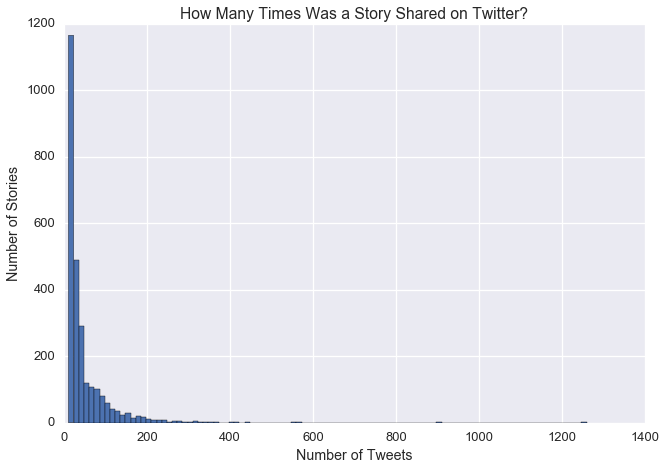

In [167]:
df.title.value_counts().hist(bins=100)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
#plt.xticks(np.arange(0,2657,100))
plt.title("How Many Times Was a Story Shared on Twitter?")
plt.savefig('/Users/Cat/Google Drive/THESIS/LATEX/images/story-share-dist.png')

In [183]:
print df.title.value_counts()[:10].to_frame().to_latex()
#top_stories
#top_stories.columns = ['Article', 'Number of Tweets']

\begin{tabular}{lr}
\toprule
{} &  title \\
\midrule
The One Weird Trait That Predicts Whether You’re a Trump Supporter &   1260 \\
Donald Trump Is Shocking, Vulgar and Right                         &    901 \\
Biden praises Sanders on income inequality                         &    563 \\
Why I'm voting for Trump                                           &    554 \\
Anne Frank's stepsister compares Donald Trump to Adolf Hitler      &    445 \\
Trump basks in his spotlight                                       &    436 \\
Rubio: Law-abiding undocumented immigrants could stay              &    413 \\
Terrorists use Trump's 'Muslim ban' speech in recruitment video    &    398 \\
Iowa caucuses: Donald Trump's moment of truth                      &    364 \\
GOP senators: If Cruz wins, we lose                                &    357 \\
\bottomrule
\end{tabular}



In [217]:
print df[df.title.isin(df.title.value_counts()[:10].index)]\
        .groupby(['title','org']).size().to_frame()\
        .sort_values(0, ascending=True) 

                                                                                0
title                                                              org           
GOP senators: If Cruz wins, we lose                                cnn        357
Iowa caucuses: Donald Trump's moment of truth                      cnn        364
Terrorists use Trump's 'Muslim ban' speech in recruitment video    cnn        398
Rubio: Law-abiding undocumented immigrants could stay              politico   413
Trump basks in his spotlight                                       cnn        436
Anne Frank's stepsister compares Donald Trump to Adolf Hitler      cnn        445
Why I'm voting for Trump                                           cnn        554
Biden praises Sanders on income inequality                         cnn        563
Donald Trump Is Shocking, Vulgar and Right                         politico   901
The One Weird Trait That Predicts Whether You’re a Trump Supporter politico  1260


## By Publication

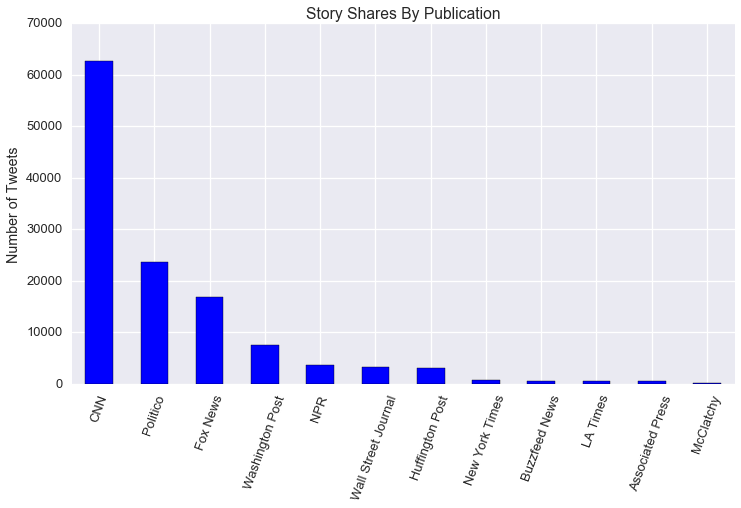

In [228]:
df.org.value_counts().plot(kind='bar', title='Story Shares By Publication')
plt.ylabel("Number of Tweets")
plt.xticks(xrange(12), ['CNN','Politico','Fox News','Washington Post',
                       'NPR','Wall Street Journal','Huffington Post','New York Times',
                       'Buzzfeed News','LA Times','Associated Press','McClatchy'],
          rotation=70)
plt.tight_layout()
plt.savefig('/Users/Cat/Google Drive/THESIS/LATEX/images/all-stories-by-pub.png')

## Most mentioned candidate

In [234]:
candid_mentions = pandas.read_csv("DATA/FOR_CORR/candid_coded_by_story.csv", index_col=0)

In [238]:
print len(candid_mentions) # we are we missing some shit is it bc we miss some body text
candid_mentions.columns

2579


Index([u'_id', u'author', u'sentiment', u'time', u'url', u'a_id',
       u'date_written', u'org', u't_id', u'candidates', u'candid_camp',
       u'num_tweets', u'sentiment_mean', u'num_tweets_all', u'wc',
       u'negativ_ct', u'positiv_ct', u'negativ_percent', u'positiv_percent',
       u'emotionality', u'positivity', u'counts', u'top_candid'],
      dtype='object')

In [278]:
candid_mentions.top_candid.value_counts() / len(candid_mentions)

TRUMP      0.588600
CRUZ       0.187282
CLINTON    0.131834
SANDERS    0.082202
Name: top_candid, dtype: float64

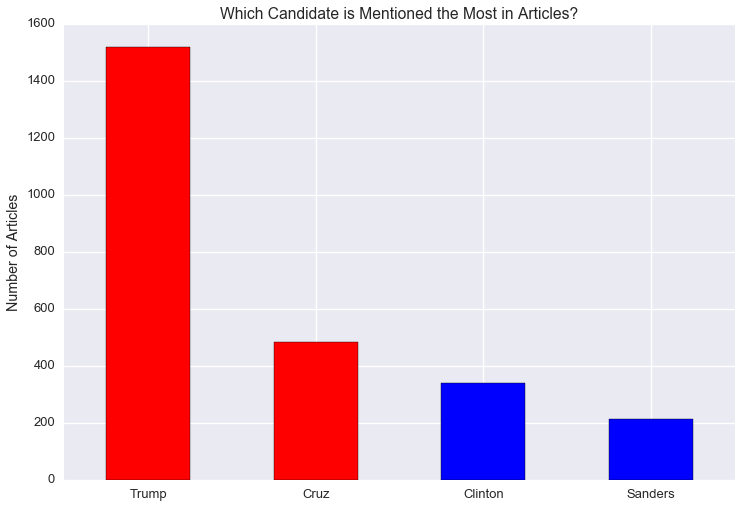

In [277]:
candid_mentions.top_candid.value_counts().plot(kind='bar', colors=['r', 'r', 'b','b']) #/ len(candid_mentions)
plt.title("Which Candidate is Mentioned the Most in Articles?")
plt.ylabel("Number of Articles")
plt.xticks(xrange(4), ['Trump', 'Cruz', 'Clinton', 'Sanders'], rotation=0)
plt.tight_layout()
plt.savefig('/Users/Cat/Google Drive/THESIS/LATEX/images/candidate-mentions.png')

In [286]:
candid_mentions[candid_mentions.top_candid == 'CRUZ'].counts.to_csv('DATA/CANDID_CODED/cruz.counts')

## Tweeters

In [58]:
tweeters = pandas.read_csv('DATA/GT_10_STORIES/user_features.csv',index_col=0)

In [59]:
len(tweeters) #20,956  --> 14326

14326

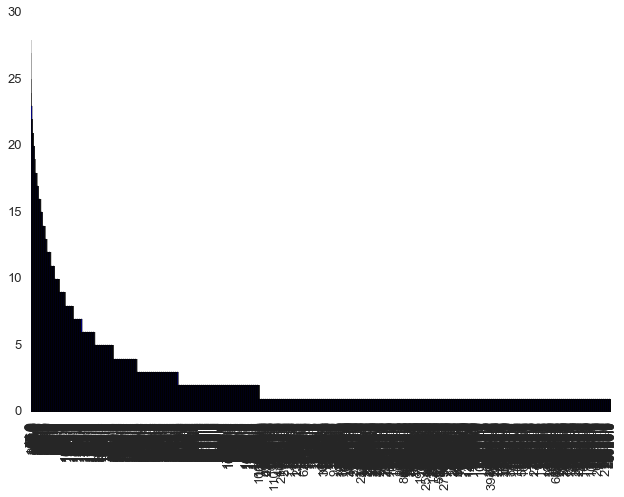

In [66]:
tweeters.follower_ct.value_counts().plot(kind='bar')

In [13]:
df_sentiment = pandas.read_csv('DATA/GT_10_STORIES/subset_sentiment.csv', index_col=0)

In [14]:
print len(df_sentiment)

123126


Index([u'sentiment_coded', u'url', u'title', u'tweet', u'candidates', u'a_id'], dtype='object')